<h1><center>ISE 529 - Homework 4</center></h1>

<div style="text-align: right"> Zenas Huang<br>ID:8806603551<br>ISE 529 Predictive Analytics, Fall 2019<br>Wednesday, 5-7:50pm Section<br>Dr. Acosta-Mejia </div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, mean_squared_error, accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

### Question 1 (30 pts.) 
Consider the Hitters data set with 20 variables of major league baseball players. It is of
interest to predict the Salary of the players. Divide the data set into a training and a test set
(50%). For some players the salary is not available (remove these rows from the data set).

#### Question 1 a)
Fit a random forest model with B = 100 bagged trees and max_features= 10. Report the test MSE. Which predictors are most important?

In [3]:
#Read in data as a pandas dataframe
df_hitters = pd.read_csv("Hitters.csv")
df_hitters[:3]

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A


In [4]:
#Remove players with NA rows
d0 = df_hitters.dropna()

In [5]:
d0.shape

(263, 20)

In [6]:
y = d0.Salary

In [7]:
x = d0.drop(['Salary'],axis=1)
x.shape

(263, 19)

In [8]:
#Create Dummy Variable encodings for the categorical features
x[['League','Division','NewLeague']] = pd.get_dummies(x[['League','Division','NewLeague']]\
                                                      ,drop_first=True)

In [9]:
#Verify all data types are numerical valued
x.dtypes

AtBat        int64
Hits         int64
HmRun        int64
Runs         int64
RBI          int64
Walks        int64
Years        int64
CAtBat       int64
CHits        int64
CHmRun       int64
CRuns        int64
CRBI         int64
CWalks       int64
League       uint8
Division     uint8
PutOuts      int64
Assists      int64
Errors       int64
NewLeague    uint8
dtype: object

In [10]:
X = x.astype('float64')

In [11]:
#Divide the data set into 50% test set and 50% train set
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.5\
                                                 ,test_size=0.5, random_state=1)

In [12]:
#Fit the model with B = 100 and max_features = 10. 
bagged_hitters = RandomForestRegressor(max_features=10, n_estimators=100,random_state=1)
bagged_hitters.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=10, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [16]:
pred = bagged_hitters.predict(X_test)

In [17]:
#get the test MSE
round(mean_squared_error(y_test,pred),2)

65737.14

In [18]:
#get predictor importance ranking scores for the random forest model  
importance = bagged_hitters.feature_importances_*100

In [19]:
rel_imp = pd.DataFrame({'Importance':importance},index=X.columns)
rel_imp

,Importance
AtBat,4.170694
Hits,5.191959
HmRun,1.408543
Runs,6.033828
RBI,11.500127
Walks,6.888873
Years,1.346956
CAtBat,6.920121
CHits,11.350808
CHmRun,5.977771


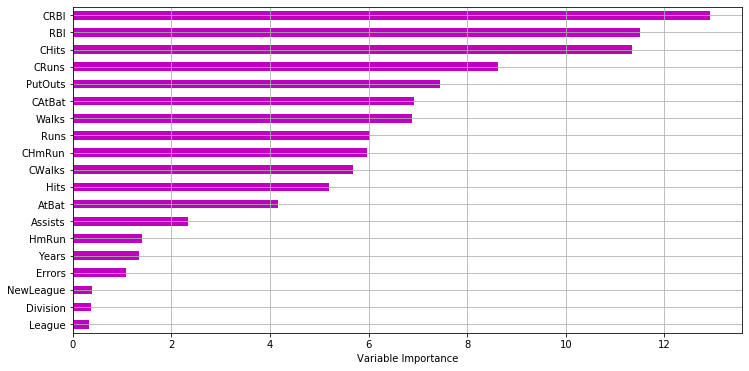

In [20]:
rel_imp.sort_values(by = 'Importance',axis = 0, ascending= True)\
                   .plot(kind = 'barh',color = 'm',figsize=(12,6))
plt.xlabel('Variable Importance')
plt.gca().legend_ = None
plt.grid()

**Answer:**<br>
Using the Random Forest with 100 bagged tress and max_features = 10:<br>
The test MSE is 90143.65.<br>
The top 6 most important predictors are CRBI, CHits, CRuns, Walks, CAtBat, AtBat.

#### Question 1 b)
Fit a Gradient boosting model with 100 trees and learning rate 0.10 and max_depth = 4. Report the test MSE. Which predictors are most important?

In [21]:
#Fit the Gradient boosting model with 100 trees, learning rate 0.10 and max_depth =4
boosted_hitters = GradientBoostingRegressor(n_estimators=100, learning_rate = 0.1\
                                            , max_depth = 4, random_state=1)
boosted_hitters.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto', random_state=1,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [22]:
pred_boost = boosted_hitters.predict(X_test)

In [23]:
#get the test MSE for gradient boosting model:
round(mean_squared_error(y_test,pred_boost),2)

92293.03

In [21]:
#get an predictor importance ranking scores for the gradient boosting model
importance = boosted_hitters.feature_importances_*100

In [24]:
rel_imp = pd.DataFrame({'Importance':importance},index=X.columns)
rel_imp

,Importance
AtBat,4.170694
Hits,5.191959
HmRun,1.408543
Runs,6.033828
RBI,11.500127
Walks,6.888873
Years,1.346956
CAtBat,6.920121
CHits,11.350808
CHmRun,5.977771


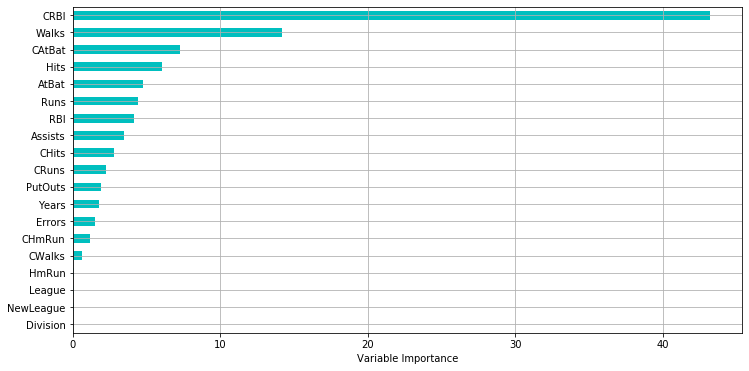

In [23]:
rel_imp.sort_values(by = 'Importance',axis = 0, ascending= True)\
                   .plot(kind = 'barh',color = 'c',figsize=(12,6))
plt.xlabel('Variable Importance')
plt.gca().legend_ = None
plt.grid()

**Answer:**<br>
Using the gradient boosting model:<br>
The test MSE is: 96344.90.<br>
The 3 most important predictors are using gradient boosting are: CRBI, Walks, and CAtBat.

#### Question 1 c)
Fit a multiple linear regression with the most important predictors found by the Random Forest Find the test MSE.

Using the result of the random forest model from part (a), we fit a multiple linear regression with the 6 most important predictors found from that model which are: CRBI, CHits, CRuns, Walks, CAtBat, AtBat.

In [25]:
#extract the top 6 features from the Train set
X_imp = X_train[['CRBI', 'CHits', 'CRuns', 'Walks', 'CAtBat', 'AtBat']]

In [26]:
X_imp[:3]

,CRBI,CHits,CRuns,Walks,CAtBat,AtBat
299,491.0,1145.0,488.0,3.0,4061.0,213.0
124,519.0,1578.0,703.0,35.0,5562.0,510.0
290,230.0,770.0,352.0,52.0,2364.0,642.0


In [27]:
#dimensions check & prep for statsmodels regression fit
X_imp.shape

(131, 6)

In [28]:
X0 = X_imp.to_numpy()

In [29]:
X1 = sm.add_constant(X0)

In [30]:
#fit the multiple linear regression model
m1 = sm.OLS(y_train,X1).fit()

In [31]:
#get model results
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     21.47
Date:                Thu, 07 Nov 2019   Prob (F-statistic):           3.57e-17
Time:                        11:26:54   Log-Likelihood:                -948.69
No. Observations:                 131   AIC:                             1911.
Df Residuals:                     124   BIC:                             1931.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        160.4915     99.043      1.620      0.108     -35.542     356.525
x1             0.6863      0.383      1.791      0.076      -0.072       1.445
x2             2.1682      0.545      3.977      0.000       1.089       3.247
x3             0.5616      0.658      0.854      0.395      -0.740       1.863
x4             4.6395      1.932      2.401      0.018       0.815       8.464
x5            -0.6984      0.154     -4.527      0.000      -1.004      -0.393
x6             0.0881      0.289      0.305      0.761      -0.484       0.660
==============================================================================
Omnibus:                       73.977   Durbin-Watson:                   1.688
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              471.154
Skew:                           1.860   Prob(JB):                    4.90e-103
Kurtosis:                      11.514   Cond. No.                     1.21e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
X_imp_test = X_test[['CRBI', 'CHits', 'CRuns', 'Walks', 'CAtBat', 'AtBat']]

In [32]:
#Get the MSE for the MLR
X0_pred = X_imp_test.to_numpy()
X1_pred = sm.add_constant(X0_pred)

In [33]:
round(mean_squared_error(y_test, m1.predict(X1_pred)),2)

130713.24

**Answer**:<br>
Using the top 6 features from the Random Forest model found in part (a), the test MSE for this Multiple Linear Regression is 130713.24.<br> The regression's $R^2$ = 0.461.

### Question 2 (20 pts.)
The file bodyfat.csv is used to study the relation of body fat $Y$ and three predictors,
triceps skinfold thickness $X_{1}$, thigh circumference $X_{2}$, and midarm circumference $X_{3}$.

In [32]:
#Read in the dataset as a pandas dataframe
df_bodyfat = pd.read_csv('bodyfat.csv')

In [33]:
df_bodyfat[:5]

,skinfold,thigh,midarm,bodyfat
0,19.5,43.1,29.1,11.9
1,24.7,49.8,28.2,22.8
2,30.7,51.9,37.0,18.7
3,29.8,54.3,31.1,20.1
4,19.1,42.2,30.9,12.9


#### Question 2 a)
Find the correlation matrix $r_{XX}$ for the predictors. Which predictors show low correlation? Fit a linear regression of midarm circumference as a function of the other two predictors. Report the $R^{2}$. Is midarm circumference linearly related to the other predictors?

In [34]:
# the correlation matrix of the predictors is:
round(df_bodyfat.corr(),4)

,skinfold,thigh,midarm,bodyfat
skinfold,1.0000,0.9238,0.4578,0.8433
thigh,0.9238,1.0000,0.0847,0.8781
midarm,0.4578,0.0847,1.0000,0.1424
bodyfat,0.8433,0.8781,0.1424,1.0000


**Answer:**<br>
From the correlation matrix above, the predictor variables which show low pairwise correlation are (midarm,skinfold:0.45), (midarm,thigh:0.08). There is also a low correlation between predictor midarm and target variable bodyfat at 0.14.

In [35]:
#Fit a multiple linear regression of midarm circumference 
#as a function of the other two predictors
#In other words, the desired fitted equation is: midarm_hat = B1_skinfold + B2_thigh
#So we first select out the target variable column
y0 = df_bodyfat.midarm

In [36]:
#select out the other two predictors
x0 = df_bodyfat[['skinfold','thigh']]

In [37]:
#preprocess the data for statsmodels regression
x = x0.to_numpy()

In [38]:
x1 = sm.add_constant(x)

In [39]:
m2 = sm.OLS(y0,x1).fit()

In [40]:
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 midarm   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     880.7
Date:                Thu, 07 Nov 2019   Prob (F-statistic):           6.82e-18
Time:                        11:27:27   Log-Likelihood:                -7.2427
No. Observations:                  20   AIC:                             20.49
Df Residuals:                      17   BIC:                             23.47
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.3308      1.239     50.293      0.000      59.716      64.946
x1             1.8809      0.045     41.816      0.000       1.786       1.976
x2            -1.6085      0.043    -37.264      0.000      -1.700      -1.517
==============================================================================
Omnibus:                        3.956   Durbin-Watson:                   1.690
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                1.402
Skew:                          -0.076   Prob(JB):                        0.496
Kurtosis:                       1.712   Cond. No.                         846.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Answer:**<br>
The fitted equation is: $midarm = 62.33+ 1.88  skinfold - 1.61  thigh$. The model's $R^{2} = 0.990$ which indicates that, yes, *midarm circumference is linearly related to the other predictors.* This is despite the fact that midarm circumference shows low pairwise correlation to each of the other two predictors individually. This ostensible contradiction may be an indication of an omitted variable bias effect (i.e. the presence of a confounding variable).

#### Question 2 b)
The VIF values for a linear regression model are the diagonal elements of $r_{XX}^{-1}$.<br>For a ridge regression model the VIF values are the diagonal elements of<br><br>
$(r_{XX} + \alpha I)^{−1} r_{XX} (r_{XX} + \alpha I)^{−1}$.<br><br>
For each predictor plot the VIF values as a function of $\alpha$ where $\alpha \in (0,1)$
with increments equal to 0.01 (all curves on the same plot, different color). Plot should include a legend.

In [41]:
#Retrieve the rXX matrix by dropping the target variable's row and column.
rXX = df_bodyfat.corr()
rXX = rXX.drop(['bodyfat'],axis=0)
rXX = rXX.drop(['bodyfat'],axis=1)
rXX

,skinfold,thigh,midarm
skinfold,1.000000,0.923843,0.457777
thigh,0.923843,1.000000,0.084667
midarm,0.457777,0.084667,1.000000


In [42]:
#Make empty lists to store VIF values for each predictor 
#and the alpha values used:
VIF_skinfold = []
VIF_midarm = []
VIF_thigh = []
alpha = []

In [43]:
#Create the loop to generate the VIF data values for each predictor:
for a in np.arange(0.0,1.00,0.01):
    A = rXX+a*np.eye(3)
    Ainv = np.linalg.inv(A)
    VIFmat = np.asarray(np.matmul(np.matmul(Ainv,rXX),Ainv)) #compute the VIF matrix
    VIF_skinfold.append(VIFmat[0][0]) #retrieve the diagonal elements of the matrix
    VIF_thigh.append(VIFmat[1][1])    #and append to each respective predictor's list
    VIF_midarm.append(VIFmat[2][2])
    alpha.append(a)                   #append the alpha value used for that iteration

In [44]:
#assemble the VIF lists as one dataframe
VIFScores = pd.DataFrame(list(zip(alpha, VIF_skinfold, VIF_thigh, VIF_midarm)), \
                         columns = ['alpha', 'VIF_skinfold', 'VIF_thigh', 'VIF_midarm'])

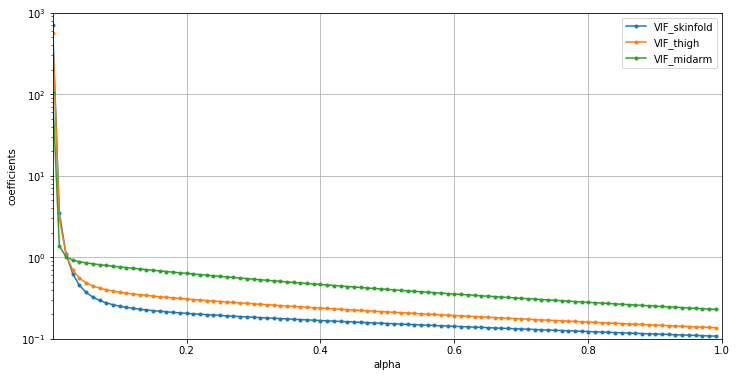

In [45]:
#Make the plot of predictor VIF values as alpha varies from (0,1).
plt.figure(figsize=(12,6))
ax = plt.gca()
for i in range(1,4):
    aux = np.array(VIFScores)[:,i]
    ax.plot(alpha,aux,label = VIFScores.columns.values[i], marker = '.') #plot predictor VIFs
    ax.set_yscale('log') #change to y-axis to log scale for readability.
    ax.set_xlim([0.0001,1])
    ax.set_ylim([0.1,1000])
plt.legend(loc='best') #include legend on the plot
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.grid()

### Question 3 (50 pts.)
Consider the Caravan.csv data set. It is of interest to predict Purchase. Create a training set consisting of the first 1,000 observations, and a test set consisting of the remaining observations.

In [46]:
#Read in the dataset as a pandas dataframe
df_caravan = pd.read_csv('Caravan.csv')

In [47]:
df_caravan[:3]

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No


In [48]:
#two categories in the target variable, so this is a classification problem.
df_caravan.Purchase.unique()

array(['No', 'Yes'], dtype=object)

#### Question 3 a)
Show that the variables PVRAAUT and AVRAAUT are highly unbalanced (having most rows belonging to a few categories).
Remove these variables from the dataset.

**Answer:**

In [49]:
#Show that PVRAAUT is an unbalanced feature heavily skewed towards category 0.
df_caravan['PVRAAUT'].value_counts()

0    5813
6       7
9       1
4       1
Name: PVRAAUT, dtype: int64

In [50]:
#Similarly, for AVRAAUT we see that the it is heavily skewed towards category 0.
df_caravan['AVRAAUT'].value_counts()

0    5813
1       6
2       2
3       1
Name: AVRAAUT, dtype: int64

In [51]:
#Remove these two variables from the dataset
df1 = df_caravan.drop(columns=['PVRAAUT','AVRAAUT'])

In [52]:
#Select out the target variable to be used in our models
y = df1.Purchase

In [53]:
#since Purchase is categorical Yes, No. We convert them to (1,0) encoding.
y = y.map(dict(Yes=1, No=0))

In [54]:
#Select out all the remaining Predictor variables 
#by removing the target variable, Purchase, from the dataset
X = df1.drop(['Purchase'], axis = 1)

In [55]:
#Use slicing to create a training set with
#the first 1000 observations and test set consisting of remaining observations.
X_train, X_test = X[:1000], X[1000:]
y_train, y_test = y[:1000], y[1000:]

#### Question 3 b)
Fit a random forest model with 500 trees and max_features = 29 to the training set with Purchase as the response and the other variables as predictors. What predictor appears to be the most important? Report the test accuracy rate.

In [56]:
#Fit a random forest model with 500 trees and max_features = 29 on the training set.
random_forest_caravan = RandomForestClassifier(max_features = 29\
                                               , n_estimators=500, random_state=1)
random_forest_caravan.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=29, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [57]:
#get the feature importance rankings and store as a dataframe
Importance = pd.DataFrame({'Importance':random_forest_caravan.feature_importances_*100},
                         index = X.columns)
Importance

,Importance
MOSTYPE,3.333823
MAANTHUI,0.978165
MGEMOMV,0.909334
MGEMLEEF,0.816398
MOSHOOFD,1.750794
MGODRK,1.195247
MGODPR,2.659090
MGODOV,1.438237
MGODGE,3.302695
MRELGE,1.997277


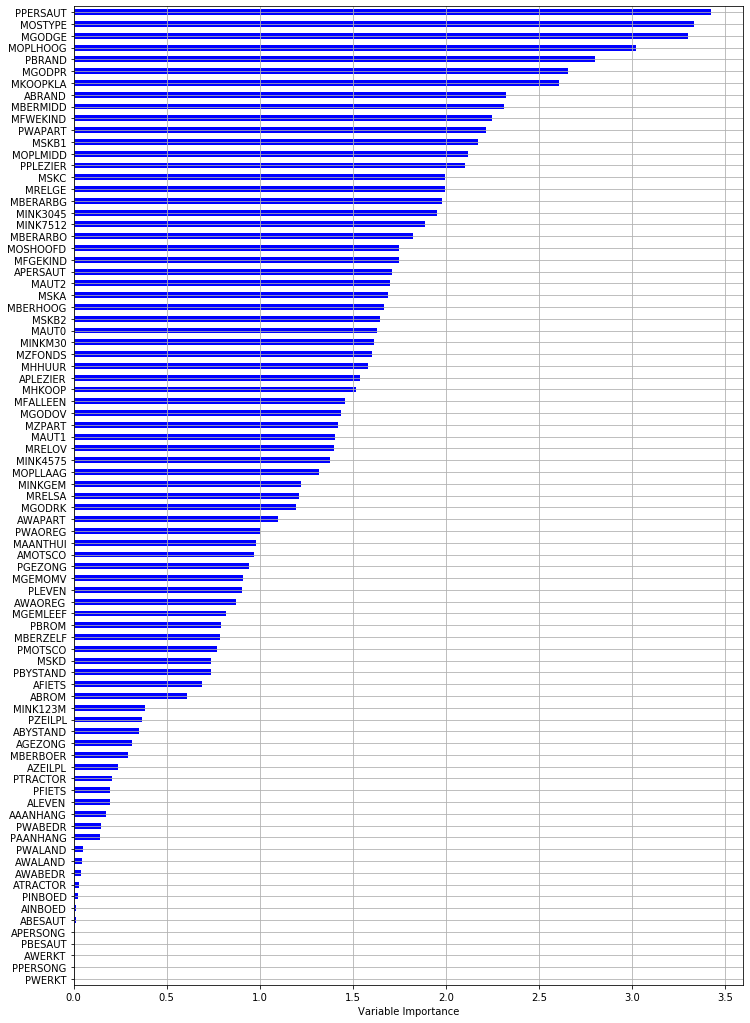

In [58]:
Importance.sort_values(by = 'Importance',axis = 0,ascending = True)\
                      .plot(kind = 'barh',color='b',figsize=(12,18))
plt.xlabel('Variable Importance')
plt.gca().legend_ = None
plt.grid()

In [59]:
#Get the Accuracy score
rf_preds = random_forest_caravan.predict(X_test)

In [60]:
round(accuracy_score(y_test,rf_preds),4)

0.9318

**Answer:**<br>
Using Random Forest Classifier, the most important predictor is PPERSAUT.<br>
The test accuracy rate is 0.9318.

#### Question 3 c)
Fit a boosting model to the training set with max_depth = 4 and Purchase as the response and the other variables as predictors. Use 1000 trees, and a shrinkage value of 0.01. What predictor appears to be the most important? Report the test accuracy rate.

In [61]:
#Fit the Boosting model on the training set using max_depth = 4, 1000 trees, shrinkage =0.01
boosted_caravan = GradientBoostingClassifier(n_estimators=1000\
                                             , learning_rate = 0.01, max_depth = 4\
                                             ,random_state=1)
boosted_caravan.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='auto',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [62]:
#Get feature importance score rankings of the boosting model
importance = boosted_caravan.feature_importances_*100

In [63]:
rel_imp = pd.DataFrame({'Importance':importance},index = X.columns)
rel_imp

,Importance
MOSTYPE,5.669139
MAANTHUI,0.315827
MGEMOMV,0.666089
MGEMLEEF,0.337222
MOSHOOFD,1.318432
MGODRK,0.940314
MGODPR,4.273577
MGODOV,0.717052
MGODGE,4.931586
MRELGE,1.617198


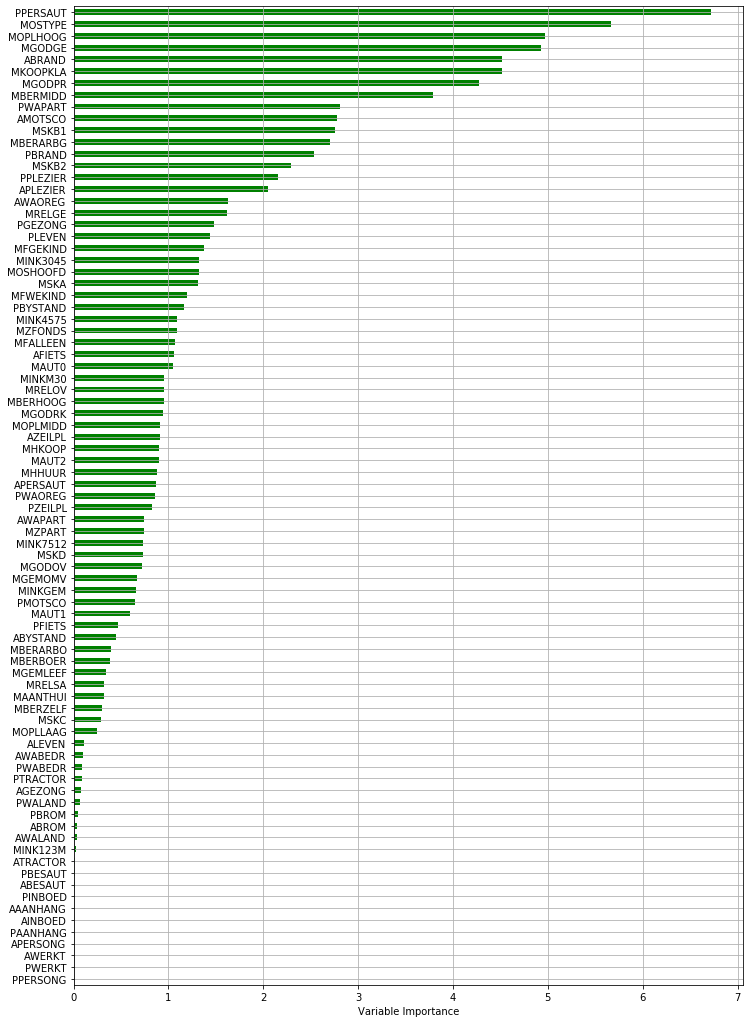

In [64]:
rel_imp.sort_values(by = 'Importance',axis = 0, ascending= True)\
                   .plot(kind = 'barh',color = 'g',figsize=(12,18))
plt.xlabel('Variable Importance')
plt.gca().legend_ = None
plt.grid()

In [65]:
#Get the accuracy rate
round(accuracy_score(y_test,boosted_caravan.predict(X_test)),4)

0.9334

**Answer**:<br>
Using Boosting model, the most important predictor is again PPERSAUT.<br>
The test accuracy rate is 0.9334.

#### Question 3 d)
Report the test accuracy rate when KNN (with n_neighbors = 3) is used to predict Purchase.

In [66]:
#Fit the KNN model with n_neighbors = 3 on the training set data
model = KNeighborsClassifier(n_neighbors=3)

In [67]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [68]:
#Retrieve the test accuracy rate for this model
round(accuracy_score(y_test, model.predict(X_test)),4)

0.9276

**Answer:**<br>
Using KNN (n_neighbors = 3), the test accuracy rate is 0.9276.<br>

#### Question 3 e)
Report the test accuracy rate when logistic regression is used to predict Purchase.

In [69]:
#fit the logistic regression model on the training data
model_LR = LogisticRegression(solver='lbfgs', max_iter = 1000)

In [70]:
model_LR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
#retrive the logistic regression's test accuracy rate
round(accuracy_score(y_test,model_LR.predict(X_test)),4)

0.9347

**Answer**:<br>
Using logistic regression, the test accuracy rate is  0.9347.<br>
